# Projeto Média Móvel

In [1]:
#@title importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#@title redefinindo proporções dos gráficos

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 5

## **Análise e Tratamento Inicial**

In [3]:
covid = pd.read_csv('dados_covid_sp.csv', sep=';')

**links para estudo estatístico**

https://www.seade.gov.br/coronavirus/#

https://github.com/seade-R/dados-covid-sp

https://www.seade.gov.br/

In [4]:
covid.head(5)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [5]:
covid.shape

(323000, 26)

### Análise dos tipos de atributos

In [6]:
#@title Tipos
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
covid.dtypes

nome_munic        object
codigo_ibge        int64
dia                int64
mes                int64
datahora          object
casos              int64
casos_novos        int64
casos_pc          object
casos_mm7d        object
obitos             int64
obitos_novos       int64
obitos_pc         object
obitos_mm7d       object
letalidade        object
nome_ra           object
cod_ra             int64
nome_drs          object
cod_drs            int64
pop                int64
pop_60             int64
area               int64
map_leg           object
map_leg_s        float64
latitude          object
longitude         object
semana_epidem      int64
dtype: object

In [7]:
#@title substituindo as vírgulas por pontos

covid['casos_mm7d'] = covid['casos_mm7d'].str.replace(',', '.')
covid['obitos_mm7d'] = covid['obitos_mm7d'].str.replace(',', '.')
covid.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [8]:
#@title transformando String em variável numérica

covid['casos_mm7d'] = pd.to_numeric(covid['casos_mm7d'])
covid['obitos_mm7d'] = pd.to_numeric(covid['obitos_mm7d'])

In [9]:
covid.dtypes

nome_munic        object
codigo_ibge        int64
dia                int64
mes                int64
datahora          object
casos              int64
casos_novos        int64
casos_pc          object
casos_mm7d       float64
obitos             int64
obitos_novos       int64
obitos_pc         object
obitos_mm7d      float64
letalidade        object
nome_ra           object
cod_ra             int64
nome_drs          object
cod_drs            int64
pop                int64
pop_60             int64
area               int64
map_leg           object
map_leg_s        float64
latitude          object
longitude         object
semana_epidem      int64
dtype: object

### Análise valores missing (NaN)

In [10]:
#@title Relação da quantidade
covid.isnull().sum()

# também é possível verificar valores faltantes em uma coluna somente:
# covid['obitos'].isnull().sum()

nome_munic         0
codigo_ibge        0
dia                0
mes                0
datahora           0
casos              0
casos_novos        0
casos_pc           0
casos_mm7d         0
obitos             0
obitos_novos       0
obitos_pc          0
obitos_mm7d        0
letalidade         0
nome_ra          500
cod_ra             0
nome_drs         500
cod_drs            0
pop                0
pop_60             0
area               0
map_leg          500
map_leg_s        500
latitude           0
longitude          0
semana_epidem      0
dtype: int64

In [11]:
#@title opção 1) substituindo valores missing por zero

covid2 = covid.fillna(0) ## fill NaN numbers
covid2.isnull().sum()

nome_munic       0
codigo_ibge      0
dia              0
mes              0
datahora         0
casos            0
casos_novos      0
casos_pc         0
casos_mm7d       0
obitos           0
obitos_novos     0
obitos_pc        0
obitos_mm7d      0
letalidade       0
nome_ra          0
cod_ra           0
nome_drs         0
cod_drs          0
pop              0
pop_60           0
area             0
map_leg          0
map_leg_s        0
latitude         0
longitude        0
semana_epidem    0
dtype: int64

In [12]:
#@title opção 2) exluindo todos os valores missing
covid3 = covid.dropna()
covid3.shape


(322500, 26)

In [13]:
#@ title pela opcão 1, selecionando uma cidade para estudo
covid_sp = covid2.loc[covid2.nome_munic == 'São Paulo']
covid_sp.head(2)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,42484114962012e-03",0.0,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,42484114962012e-03",0.0,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9


## **Média Móvel Casos Novos**

- ```casos_mm7d``` é a média móvel simples
- período: 2020-02-25 ~ 2021-07-08

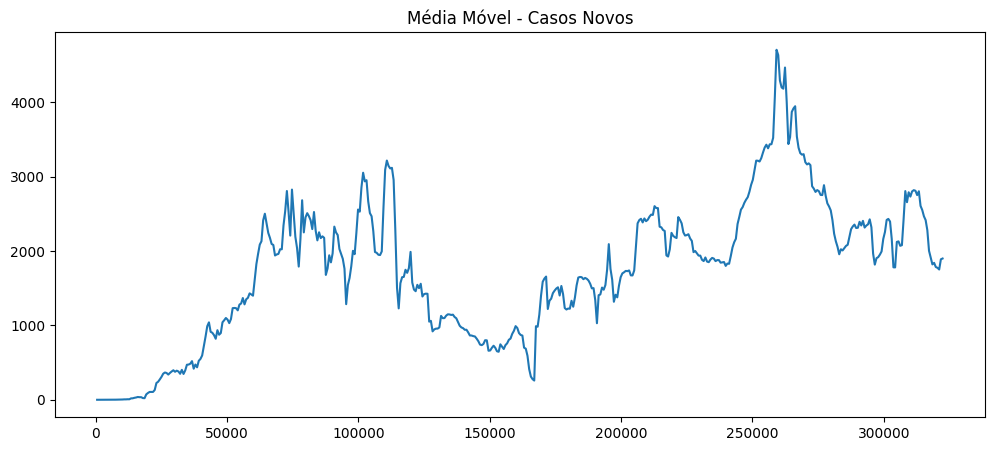

In [14]:
#@title plotando média móvel pelo dataframe
plt.plot(covid_sp.casos_mm7d)
plt.title('Média Móvel - Casos Novos')
plt.grid(False)
plt.show()

In [15]:
#@title criando uma série com casos novos
serie = pd.Series(covid_sp['casos_novos'].values, index = covid_sp['datahora'])
serie

datahora
2020-02-25       0
2020-02-26       0
2020-02-27       0
2020-02-28       1
2020-02-29       0
              ... 
2021-07-04     706
2021-07-05     490
2021-07-06    2619
2021-07-07    2184
2021-07-08    2230
Length: 500, dtype: int64

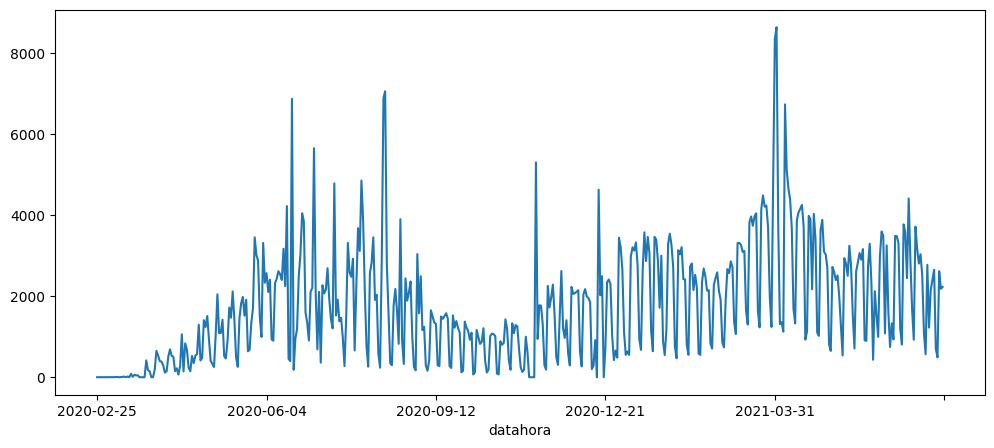

In [16]:
serie.plot();

In [17]:
#@title média móvel com período de 7 dias
media_casos = serie.rolling(window=7,center=True)
media_casos = media_casos.mean()

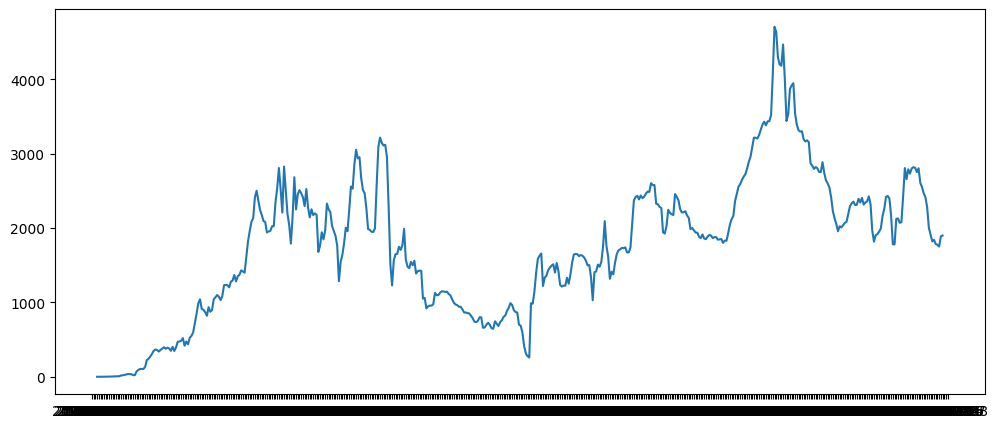

In [18]:
#@title plotando média móvel pela série
plt.plot(media_casos);

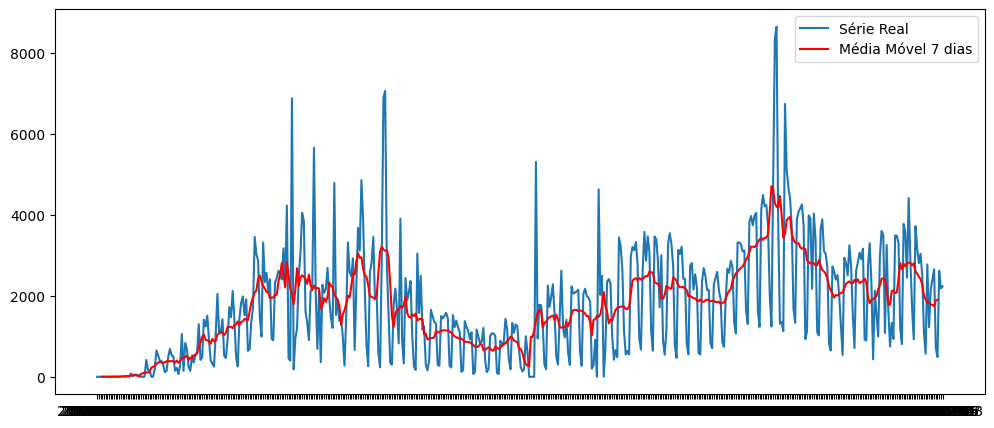

In [19]:
#@title plotando série real e média móvel (7 dias)
plt.plot(serie, label='Série Real')
plt.plot(media_casos,color='red', label='Média Móvel 7 dias')
plt.legend(loc='best')
plt.show()

## **Média Móvel Óbitos Novos**

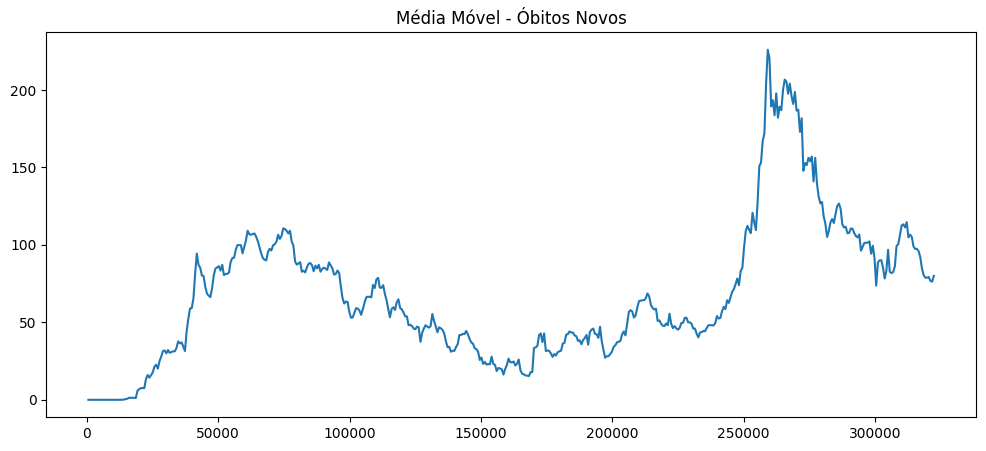

In [20]:
#@title média móvel pelo dataframe
plt.plot(covid_sp.obitos_mm7d)
plt.title('Média Móvel - Óbitos Novos')
plt.grid(False)
plt.show()

In [21]:
#@title criando uma série com óbitos novos
serie = pd.Series(covid_sp['obitos_novos'].values, index = covid_sp['datahora'])
serie

datahora
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
             ... 
2021-07-04      8
2021-07-05     14
2021-07-06    136
2021-07-07     88
2021-07-08    119
Length: 500, dtype: int64

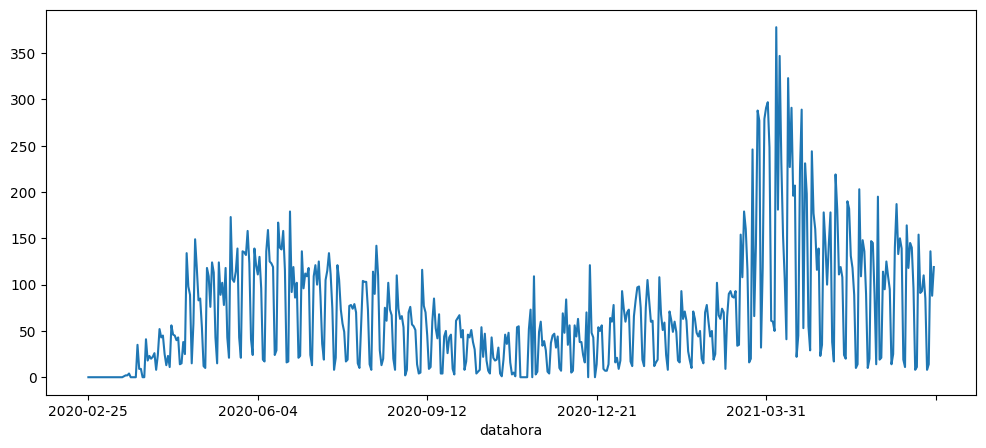

In [22]:
serie.plot();

In [23]:
#@title realizando a média móvel (7 dias)
media_obitos = serie.rolling(window=7, center=True)
media_obitos = media_obitos.mean()

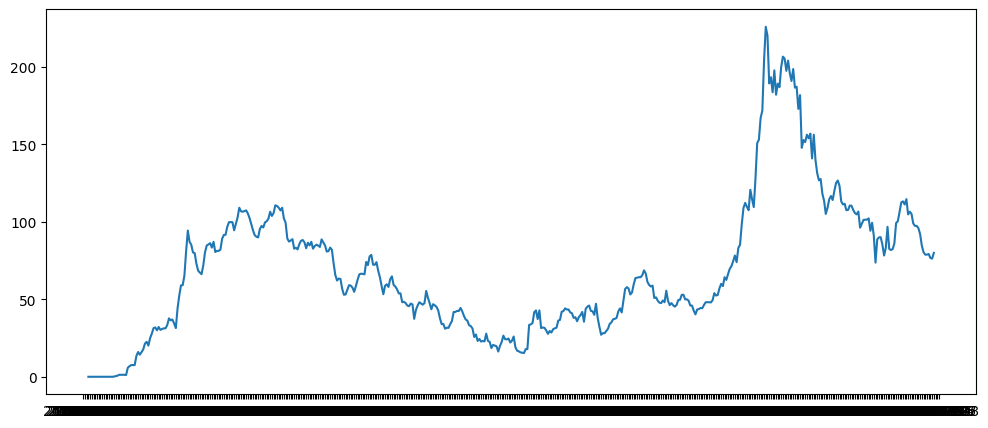

In [24]:
#@title plotando média móvel pela série
plt.plot(media_obitos);

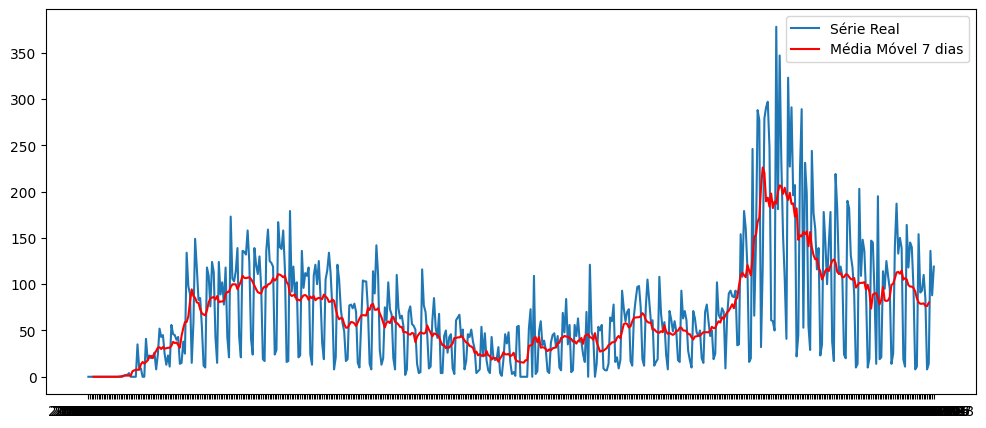

In [25]:
#@title plotando média móvel e série real
plt.plot(serie, label='Série Real')
plt.plot(media_obitos,color='red', label='Média Móvel 7 dias')
plt.legend(loc='best')
plt.show()